In [549]:
import settings

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
# import geoplot
import adjustText as aT
from geocube.api.core import make_geocube
from geocube import rasterize
from rasterio import features
# from os.path import isfile, join
from os import listdir, path, mkdir
import random
from shapely.geometry import box, mapping
import json
import math
from PIL import Image
#nice
random.seed(69)

In [468]:
def get_files(directory):
    return [path.join(directory, f) for f in listdir(directory) if path.isfile(path.join(directory, f))]

In [469]:
# source_folder, dump_destination = settings.DATA_DESTINATION_REGIONS, settings.PLOTS_DESTINATION_REGION
source_folder, dump_destination = settings.DATA_DESTINATION_LTLA, settings.PLOTS_DESTINATION_LTLA

In [470]:
if path.exists(dump_destination) is False:
        mkdir(dump_destination)

geo_jsons = get_files(source_folder)

In [471]:
print('Reading {file_count} files...'.format(file_count = len(geo_jsons)))
areas = [gpd.read_file(f) for f in geo_jsons]


Reading 380 files...


In [472]:
combinedArea = pd.concat([x for x in areas])
combinedArea.set_geometry("geometry")

,active,areachect,areaehect,areaihect,arealhect,child_count,child_counts,code,date_end,date_start,...,equivalents,has_boundary,name,name_welsh,owner,parent,sort_order,statutory_instrument_id,statutory_instrument_title,geometry
0,True,9371,9834.66,0.0,9371.26,49,"{'msoa11': 12, 'ncp': 1, 'par': 8, 'ward': 28}",E06000001,None,"Thu, 01 Jan 2009 00:00:00 GMT",...,"{'mhclg': 'H0724', 'nhs': '111', 'ons': '00EB'}",True,Hartlepool,None,MHCLG,E12000001,E06000001,1111/1001,GSS re-coding strategy,"MULTIPOLYGON (((-1.27025 54.72717, -1.26822 54..."
0,True,5388,5455.37,0.0,5388.16,65,"{'msoa11': 19, 'ncp': 1, 'par': 2, 'ward': 43}",E06000002,None,"Thu, 01 Jan 2009 00:00:00 GMT",...,"{'mhclg': 'W0734', 'nhs': '112', 'ons': '00EC'}",True,Middlesbrough,None,MHCLG,E12000001,E06000002,1111/1001,GSS re-coding strategy,"MULTIPOLYGON (((-1.23002 54.58412, -1.23017 54..."
0,True,24506,25378.57,0.0,24506.98,71,"{'msoa11': 19, 'ncp': 1, 'par': 5, 'ward': 46}",E06000003,None,"Thu, 01 Jan 2009 00:00:00 GMT",...,"{'mhclg': 'V0728', 'nhs': '113', 'ons': '00EE'}",True,Redcar and Cleveland,None,MHCLG,E12000001,E06000003,1111/1001,GSS re-coding strategy,"MULTIPOLYGON (((-1.13483 54.63859, -1.13155 54..."
0,True,20493,20973.09,0.0,20493.31,81,"{'msoa11': 24, 'ncp': 1, 'par': 30, 'ward': 26}",E06000004,None,"Thu, 01 Jan 2009 00:00:00 GMT",...,"{'mhclg': 'H0738', 'nhs': '114', 'ons': '00EF'}",True,Stockton-on-Tees,None,MHCLG,E12000001,E06000004,1111/1001,GSS re-coding strategy,"MULTIPOLYGON (((-1.31776 54.64525, -1.31715 54..."
0,True,19747,19747.58,0.0,19747.58,90,"{'msoa11': 15, 'ncp': 1, 'par': 30, 'ward': 44}",E06000005,None,"Thu, 01 Jan 2009 00:00:00 GMT",...,"{'mhclg': 'N1350', 'nhs': '117', 'ons': '00EH'}",True,Darlington,None,MHCLG,E12000001,E06000005,1111/1001,GSS re-coding strategy,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670..."


In [473]:
combinedArea = combinedArea.filter(['geometry', 'areachect', 'code'])
combinedArea.reset_index(inplace= True)
combinedArea

,index,geometry,areachect,code
0,0,"MULTIPOLYGON (((-1.27025 54.72717, -1.26822 54...",9371,E06000001
1,0,"MULTIPOLYGON (((-1.23002 54.58412, -1.23017 54...",5388,E06000002
2,0,"MULTIPOLYGON (((-1.13483 54.63859, -1.13155 54...",24506,E06000003
3,0,"MULTIPOLYGON (((-1.31776 54.64525, -1.31715 54...",20493,E06000004
4,0,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670...",19747,E06000005
...,...,...,...,...
375,0,"POLYGON ((-3.10597 51.79548, -3.09636 51.79155...",12624,W06000020
376,0,"MULTIPOLYGON (((-3.05215 51.97295, -3.05142 51...",85026,W06000021
377,0,"MULTIPOLYGON (((-2.83440 51.64824, -2.83453 51...",19037,W06000022
378,0,"MULTIPOLYGON (((-3.90622 52.56080, -3.91219 52...",519531,W06000023


In [474]:
bounds = combinedArea['geometry'].bounds
bounds

,minx,miny,maxx,maxy
0,-1.383764,54.621901,-1.157637,54.727169
1,-1.285432,54.501125,-1.137369,54.590703
2,-1.201743,54.487849,-0.788625,54.647553
3,-1.452641,54.464155,-1.158750,54.645251
4,-1.709667,54.451165,-1.407292,54.619366
...,...,...,...,...
375,-3.143924,51.606675,-2.958894,51.796232
376,-3.157352,51.525304,-2.649873,51.983143
377,-3.124190,51.501906,-2.803011,51.649471
378,-3.928862,51.752751,-2.949621,52.901576


In [475]:
bounds[['minx', 'miny']].min()

minx    -8.649996
miny    49.958695
dtype: float64

In [476]:
bounds[['maxx', 'maxy']].max()

maxx     1.763706
maxy    60.860782
dtype: float64

In [477]:
multi_polygon = test.geometry[0]

In [478]:
multi_polygon.geoms

In [479]:
multi_polygon.bounds

(-1.38376395297565, 54.6219010345973, -1.15763713826617, 54.727168687781)

In [480]:
multi_polygon.geom_type 

'MultiPolygon'

In [481]:
polygon = test.geometry[4]

In [482]:
#R eturns a string specifying the Geometry Type of the object in accordance with https://shapely.readthedocs.io/en/stable/manual.html#id22.
polygon.geom_type

'Polygon'

In [483]:
# Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.
polygon.bounds

(-1.70966705947947, 54.4511648524724, -1.40729171028139, 54.6193656809116)

In [484]:
categorical_enums = {'code': combinedArea.code.drop_duplicates().values.tolist()}


In [528]:
class projection_settings:
    """ This affects the rasterisation process """
    
    # Custom projection box lat(x) long(y) in degrees
    # Should be big enough to contain all the data
    # This one correspons to the whole of UK
    minx = -8.64999583313928
    miny = 49.9586951724897
    maxx = 1.76370560966352
    maxy = 60.8607823901619
    # How many pixels do I want per deg(lat|long), sign determines direction
    resolution = (-0.01, 0.01)
    
    def __init__(self, gdf):
        """ Takes in geopandas data frame and calculates the combined shape boundaries"""
        bounds = gdf['geometry'].bounds
        self.maxx, self.maxy = bounds[['maxx', 'maxy']].max()
        self.minx, self.miny = bounds[['minx', 'miny']].min()
        
    def bounds(self):
        return (self.minx,self. miny, self.maxx, self.maxy)
    
    def set_resolution(self, x, y):
        """ Tries to adjust the projection settings so that the 
            final projection produced corresponds to the resolution
            in parameters in pixels.
            Preserves projections original ratio, adds margins"""
        ratio = x/y
        #ratio = 0
        #if x > y:
        #    ratio = x/y
        #else:
        #    ratio = y/x
        
        cur_x = self.maxx - self.minx
        cur_y = self.maxy - self.miny
        
        x_smaller = cur_x < cur_y
        
        cur_ratio = cur_x/cur_y
        print("ratio, cur_ratio", ratio, cur_ratio)
        
        # If the ratio is already very similar, return.
        if math.isclose(ratio, cur_ratio, rel_tol=0.001):
            return
        
        
        # We are interested in how much to add to get to the wanted ratio
        extend_x = ratio > cur_ratio
        print("extend_x", extend_x)
        if extend_x:
            x_add = (((cur_x/cur_ratio) * ratio) - cur_x) / 2
            self.maxx += x_add
            self.minx -= x_add
            print('Adding to x', x_add)
        else:
            y_add = (((1/ratio)*cur_x) - cur_y) / 2
            self.maxy += y_add
            self.miny -= y_add
            print('Adding to y', y_add)
        
        print(ratio)        
        print("x", cur_x)
        print("y", cur_y)
        cur_x = self.maxx - self.minx
        cur_y = self.maxy - self.miny
        cur_ratio = cur_x/cur_y
        print()
        print("cur_ratio", cur_ratio)
        print("x", cur_x)
        print("y", cur_y)
        pixx_per_deg = x / cur_x
        pixy_per_deg = y / cur_y
        self.resolution = (1 / pixx_per_deg, 1/pixy_per_deg)
        print("pixx_per_deg", pixx_per_deg)
        print("pixy_per_deg", pixy_per_deg)
        print("resolution", self.resolution)
        # cur_ratio

proj_set = projection_settings(combinedArea)

In [529]:
proj_set.set_resolution(1920, 1080)

ratio, cur_ratio 1.7777777777777777 0.9552025437773297
extend_x True
Adding to x 4.483893472085002
1.7777777777777777
x 10.4137014428028
y 10.902087217672204

cur_ratio 1.7777777777777777
x 19.381488386972805
y 10.902087217672204
pixx_per_deg 99.06359933071604
pixy_per_deg 99.06359933071604
resolution (0.010094525201548335, 0.010094525201548335)


In [530]:
proj_set.set_resolution(1920, 1080)

ratio, cur_ratio 1.7777777777777777 1.7777777777777777


## Currently there is no compensation for earth curvature
if you have enough time, fix this using [this](https://keisan.casio.com/exec/system/1224587128)

In [531]:
# this would not be pretty proj_set.set_resolution(1080, 1920)

In [532]:
# this would not be pretty proj_set.set_resolution(1080, 1920)

In [533]:
proj_set.bounds()

(-13.133889305224283, 49.9586951724897, 6.247599081748522, 60.8607823901619)

In [534]:
out_grid = make_geocube(
    vector_data=test,
    resolution= proj_set.resolution,
    categorical_enums=categorical_enums,
    measurements = ['code'],
    output_crs="epsg:4326",
    geom=json.dumps(mapping(box(proj_set.minx, proj_set.miny, proj_set.maxx, proj_set.maxy))),
)
out_grid

<xarray.Dataset>
Dimensions:          (code_categories: 381, x: 1921, y: 1080)
Coordinates:
  * y                (y) float64 49.96 49.97 49.98 49.99 ... 60.83 60.84 60.85
  * x                (x) float64 -13.14 -13.13 -13.12 ... 6.223 6.233 6.243
  * code_categories  (code_categories) object 'E06000001' ... 'nodata'
    spatial_ref      int32 0
Data variables:
    code             (y, x) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Attributes:
    grid_mapping:  spatial_ref

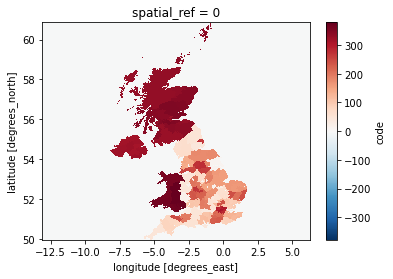

In [535]:
out_grid.code.plot()

In [527]:
# out_grid.code.rio.to_raster("lsad_num.tif")

In [538]:
codes = np.array(out_grid.code.values)
x_vals = np.array(out_grid.x)
y_vals = np.array(out_grid.y)

In [557]:
print(len(codes[1]), len(codes), len(x_vals), len(y_vals))

1921 1080 1921 1080


1921

In [569]:
img = Image.new( 'RGB', (len(x_vals),len(y_vals)), "black") # Create a new black image
pixels = img.load() # Create the pixel map
for i in range(img.size[0]):    # For every pixel:
    for j in range(img.size[1]):
        code = codes[j][i]
        if(code == -1):
            pixels[i,-j] = (0,0,0)
            continue
        pixels[i,-j] = (int(code % 128 + 128), 100, 120) 
#         pixels[i,-j] = (int(code % 256), int(code % 128 *2), int(code % 256*3)) # Set the colour accordingly
        # you will certainly die if you uncomment this, or at least your browser
        # print((int(code % 256), int(code % 128 *2), int(code % 256*3)))

img.show()

In [563]:
img = Image.new( 'RGB', (250,250), "black") # create a new black image
pixels = img.load() # create the pixel map

for i in range(img.size[0]):    # for every col:
    for j in range(img.size[1]):    # For every row
        pixels[i,-j] = (i, j, 100) # set the colour accordingly

img.show()

In [539]:
categories = np.unique(codes)
categories

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 14

In [540]:
print(x_vals.max(), x_vals.min(), y_vals.max(), y_vals.min())

6.243463837157645 -13.138024549815158 60.85484517753414 49.962852485063486


In [570]:
output_data = []
for i in range(len(x_vals)):
    output_data.append([x_vals[i], y_vals[i], codes[i]])
print(output_data)

IndexError: index 1080 is out of bounds for axis 0 with size 1080

In [571]:
output_data = []
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        output_data.append([x_vals[i], y_vals[j], codes[j][i]])


In [572]:
output_data

[[-13.138024549815158, 49.962852485063486, -1.0],
 [-13.138024549815158, 49.97294701026503, -1.0],
 [-13.138024549815158, 49.98304153546658, -1.0],
 [-13.138024549815158, 49.99313606066813, -1.0],
 [-13.138024549815158, 50.00323058586968, -1.0],
 [-13.138024549815158, 50.013325111071225, -1.0],
 [-13.138024549815158, 50.02341963627278, -1.0],
 [-13.138024549815158, 50.03351416147432, -1.0],
 [-13.138024549815158, 50.043608686675874, -1.0],
 [-13.138024549815158, 50.05370321187742, -1.0],
 [-13.138024549815158, 50.063797737078964, -1.0],
 [-13.138024549815158, 50.073892262280516, -1.0],
 [-13.138024549815158, 50.08398678748206, -1.0],
 [-13.138024549815158, 50.09408131268361, -1.0],
 [-13.138024549815158, 50.10417583788516, -1.0],
 [-13.138024549815158, 50.11427036308671, -1.0],
 [-13.138024549815158, 50.124364888288255, -1.0],
 [-13.138024549815158, 50.13445941348981, -1.0],
 [-13.138024549815158, 50.14455393869135, -1.0],
 [-13.138024549815158, 50.154648463892904, -1.0],
 [-13.1380245

In [574]:
output_data_simple = []
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        output_data_simple.append((i, j, codes[j][i]))
output_data_simple


[(0, 0, -1.0),
 (0, 1, -1.0),
 (0, 2, -1.0),
 (0, 3, -1.0),
 (0, 4, -1.0),
 (0, 5, -1.0),
 (0, 6, -1.0),
 (0, 7, -1.0),
 (0, 8, -1.0),
 (0, 9, -1.0),
 (0, 10, -1.0),
 (0, 11, -1.0),
 (0, 12, -1.0),
 (0, 13, -1.0),
 (0, 14, -1.0),
 (0, 15, -1.0),
 (0, 16, -1.0),
 (0, 17, -1.0),
 (0, 18, -1.0),
 (0, 19, -1.0),
 (0, 20, -1.0),
 (0, 21, -1.0),
 (0, 22, -1.0),
 (0, 23, -1.0),
 (0, 24, -1.0),
 (0, 25, -1.0),
 (0, 26, -1.0),
 (0, 27, -1.0),
 (0, 28, -1.0),
 (0, 29, -1.0),
 (0, 30, -1.0),
 (0, 31, -1.0),
 (0, 32, -1.0),
 (0, 33, -1.0),
 (0, 34, -1.0),
 (0, 35, -1.0),
 (0, 36, -1.0),
 (0, 37, -1.0),
 (0, 38, -1.0),
 (0, 39, -1.0),
 (0, 40, -1.0),
 (0, 41, -1.0),
 (0, 42, -1.0),
 (0, 43, -1.0),
 (0, 44, -1.0),
 (0, 45, -1.0),
 (0, 46, -1.0),
 (0, 47, -1.0),
 (0, 48, -1.0),
 (0, 49, -1.0),
 (0, 50, -1.0),
 (0, 51, -1.0),
 (0, 52, -1.0),
 (0, 53, -1.0),
 (0, 54, -1.0),
 (0, 55, -1.0),
 (0, 56, -1.0),
 (0, 57, -1.0),
 (0, 58, -1.0),
 (0, 59, -1.0),
 (0, 60, -1.0),
 (0, 61, -1.0),
 (0, 62, -1.0),
 (

In [606]:
cat_labels = out_grid.code_categories.to_dict()['data']
cat_labels

['E06000001',
 'E06000002',
 'E06000003',
 'E06000004',
 'E06000005',
 'E06000006',
 'E06000007',
 'E06000008',
 'E06000009',
 'E06000010',
 'E06000011',
 'E06000012',
 'E06000013',
 'E06000014',
 'E06000015',
 'E06000016',
 'E06000017',
 'E06000018',
 'E06000019',
 'E06000020',
 'E06000021',
 'E06000022',
 'E06000023',
 'E06000024',
 'E06000025',
 'E06000026',
 'E06000027',
 'E06000030',
 'E06000031',
 'E06000032',
 'E06000033',
 'E06000034',
 'E06000035',
 'E06000036',
 'E06000037',
 'E06000038',
 'E06000039',
 'E06000040',
 'E06000041',
 'E06000042',
 'E06000043',
 'E06000044',
 'E06000045',
 'E06000046',
 'E06000047',
 'E06000049',
 'E06000050',
 'E06000051',
 'E06000052',
 'E06000054',
 'E06000055',
 'E06000056',
 'E06000057',
 'E06000058',
 'E06000059',
 'E07000004',
 'E07000005',
 'E07000006',
 'E07000007',
 'E07000008',
 'E07000009',
 'E07000010',
 'E07000011',
 'E07000012',
 'E07000026',
 'E07000027',
 'E07000028',
 'E07000029',
 'E07000030',
 'E07000031',
 'E07000032',
 'E070

In [607]:
cat_labels[len(cat_labels) - 1]
temp = cat_labels[len(cat_labels) - 1]
for i in range(1, len(cat_labels)):
    cat_labels[-i] = cat_labels[-i -1]
cat_labels[0] = temp
cat_labels

['nodata',
 'E06000001',
 'E06000002',
 'E06000003',
 'E06000004',
 'E06000005',
 'E06000006',
 'E06000007',
 'E06000008',
 'E06000009',
 'E06000010',
 'E06000011',
 'E06000012',
 'E06000013',
 'E06000014',
 'E06000015',
 'E06000016',
 'E06000017',
 'E06000018',
 'E06000019',
 'E06000020',
 'E06000021',
 'E06000022',
 'E06000023',
 'E06000024',
 'E06000025',
 'E06000026',
 'E06000027',
 'E06000030',
 'E06000031',
 'E06000032',
 'E06000033',
 'E06000034',
 'E06000035',
 'E06000036',
 'E06000037',
 'E06000038',
 'E06000039',
 'E06000040',
 'E06000041',
 'E06000042',
 'E06000043',
 'E06000044',
 'E06000045',
 'E06000046',
 'E06000047',
 'E06000049',
 'E06000050',
 'E06000051',
 'E06000052',
 'E06000054',
 'E06000055',
 'E06000056',
 'E06000057',
 'E06000058',
 'E06000059',
 'E07000004',
 'E07000005',
 'E07000006',
 'E07000007',
 'E07000008',
 'E07000009',
 'E07000010',
 'E07000011',
 'E07000012',
 'E07000026',
 'E07000027',
 'E07000028',
 'E07000029',
 'E07000030',
 'E07000031',
 'E070000